<a href="https://colab.research.google.com/github/msalvati1997/mushrooms_classificator/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrooooms : analisi della commestibilità dei funghi



Lo scopo del progetto è quello di predire se dato un fungo sconosciuto, esso sia commestibile o meno, sulla base dell'integrazione di diverse funzionalità di Machine learning offerte da librerie software.

Il dataset utilizzato è Mushrooms 2 UCI, della Philipps-University (Marburg, Germania), ed include 61069 ipotetici funghi con cappello basati su 173 specie (353 funghi per specie).
Ogni fungo è identificato come commestibile, velenoso, o di
commestibilità sconosciuta e sconsigliata (quest'ultima classe è combinata con la classe velenosa).

I funghi appartenenti al suddetto dataset sono stati ottenuti a partire da un dataset primario contenente informazioni su alcuni funghi descritti all'interno di un'enciclopedia.

Seguono gli attributi del dataset.

Feature | Meaning
------ | ------
cap-diameter (m)| float number in cm
cap-shape (n)| bell=b, conical=c, convex=x, flat=f, sunken=s,spherical=p, others=o
cap-surface (n)| fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h,leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
cap-color (n)| brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
does-bruise-or-bleed (n)| bruises-or-bleeding=t,no=f
gill-attachment (n)| adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
gill-spacing (n)|close=c, distant=d, none=f
gill-color (n)| see cap-color + none=f
stem-height (m)| float number in cm
stem-width (m)| float number in mm
stem-root (n)| bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
stem-surface (n)| see cap-surface + none=f
stem-color (n)| see cap-color + none=f
veil-type (n)| partial=p, universal=u
veil-color (n)| see cap-color + none=f
has-ring (n)| ring=t, none=f
ring-type (n)| cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l,pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
spore-print-color (n)| see cap color
habitat (n)| grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u,waste=w, woods=d
season (n)| spring=s, summer=u, autumn=a, winter=w




## 1 Analisi dei dati


### 1.1 Importazione delle librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn.metrics as mt
from sklearn.preprocessing import OrdinalEncoder
import scipy.stats as ss
from statsmodels.stats.multicomp import pairwise_tukeyhsd

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

### 1.2 Importazione del dataset


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/msalvati1997/mushrooms_classificator/main/secondary_data.csv") 

In [3]:
print("Dimensionalità del dataset:")
print("# Istanze :", df.shape[0])
print("# Attributi :", df.shape[1]-1)
print("Feature Target : class")

Dimensionalità del dataset:
# Istanze : 61069
# Attributi : 20
Feature Target : class


#### 1.2.1 Manipolazione dataset

##### 1.2.1.2 Valori mancanti

Una volta importato il dataset, ci siamo accorti della mancanza di alcuni valori. 

Gestire i valori mancanti è importante ai fini dell'apprendimento. 

In [4]:
null_table= pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
null_table.columns=['null ratio']
null_table

,null ratio
veil-type,0.947977
spore-print-color,0.895954
veil-color,0.878613
stem-root,0.843931
stem-surface,0.624277
gill-spacing,0.410405
cap-surface,0.231214
gill-attachment,0.161850
ring-type,0.040462
class,0.000000


Effetuiamo la sostituzione dei valori mancanti.

In [5]:
df.fillna('')
for col in df.columns:
   df[col]= df[col].replace('','-')
   df[col]= df[col].replace(np.nan,'-')


In [6]:
null_table= pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df))
null_table.columns=['null ratio']
null_table

,null ratio
class,0.0
stem-root,0.0
habitat,0.0
spore-print-color,0.0
ring-type,0.0
has-ring,0.0
veil-color,0.0
veil-type,0.0
stem-color,0.0
stem-surface,0.0


##### 1.2.1.1 Conversione target

Il target è presente nella forma di variabile categorica (e=edible, p=poisonous). Per facilitare la fase di apprendimento, abbiamo convertito la variabile in (1=edible, 0=poisonous).

In [7]:
column_values = df['class'].unique()
count = 0 
print('Class conversion:')
for u in column_values: 
      df['class'] = df['class'].replace(u,count)
      print("\t",u, "->", count)
      count += 1

Class conversion:
	 p -> 0
	 e -> 1


### 1.3 Dataset

In [8]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,x,g,o,f,e,-,w,16.95,...,s,y,w,u,w,t,g,-,d,w
1,0,16.60,x,g,o,f,e,-,w,17.99,...,s,y,w,u,w,t,g,-,d,u
2,0,14.07,x,g,o,f,e,-,w,17.80,...,s,y,w,u,w,t,g,-,d,w
3,0,14.17,f,h,e,f,e,-,w,15.77,...,s,y,w,u,w,t,p,-,d,w
4,0,14.64,x,h,o,f,e,-,w,16.53,...,s,y,w,u,w,t,p,-,d,w
5,0,15.34,x,g,o,f,e,-,w,17.84,...,s,y,w,u,w,t,p,-,d,u
6,0,14.85,f,h,o,f,e,-,w,17.71,...,s,y,w,u,w,t,g,-,d,w
7,0,14.86,x,h,e,f,e,-,w,17.03,...,s,y,w,u,w,t,p,-,d,u
8,0,12.85,f,g,o,f,e,-,w,17.27,...,s,y,w,u,w,t,p,-,d,a
9,0,13.55,f,g,e,f,e,-,w,16.04,...,s,y,w,u,w,t,p,-,d,w


In [9]:
df.describe()


,class,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000,61069.000000
mean,0.445087,6.733854,6.581538,12.149410
std,0.496979,5.264845,3.370017,10.035955
min,0.000000,0.380000,0.000000,0.000000
25%,0.000000,3.480000,4.640000,5.210000
50%,0.000000,5.860000,5.950000,10.190000
75%,1.000000,8.540000,7.740000,16.570000
max,1.000000,62.340000,33.920000,103.910000


### 1.4 Bilanciamento

Verifichiamo ora che il dataset sia bilanciato. Qualora non lo fosse potremmo applicare metodi di ricampionamento come oversampling e undersampling.

In [10]:
col = ['red','green']
lab = ['Poisonous','Edible']
valori = df['class'].value_counts()/df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=lab, values=valori, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=col, line=dict(color='white', width=2)))
fig.update_layout(
    title_text="Mushrooms edibility",
    title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

Vista e considerata la similarità delle percentuali, il dataset risulta essere bilanciato.

### 1.4 Correlazione

Verifichiamo a questo punto la correlazione tra i diversi attributi utilizzando la matrice di correlazione.

#### 1.4.1 Correlazione features numeriche

Per la correlazione delle variabili numeriche è stato usato il coefficente di correlazione di Pearson. 

Il coefficiente di correlazione di Pearson (dal nome di Karl Pearson) può essere utilizzato per riassumere la forza della relazione lineare tra due campioni di dati.
Il coefficiente di correlazione di Pearson è calcolato come la covarianza delle due variabili divisa per il prodotto della deviazione standard di ciascun campione di dati.

L'uso della media e della deviazione standard nel calcolo suggerisce la necessità che i campioni di dati abbiano una distribuzione gaussiana o di tipo gaussiano.

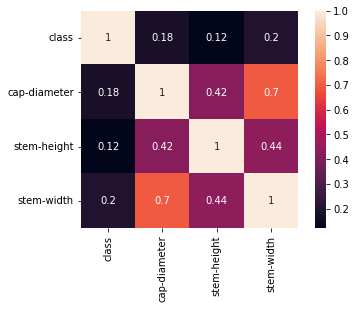

In [11]:
corr = df.corr(method='pearson')
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

Conclusioni:

1.   Cap-diameter e stem-width sono correlati
2.   Stem-height e cap-diameter sono leggermente correlati
3.   Stem-width e stem-height sono leggermente correlati 



Vediamo come variano le distribuzioni dei suddetti attributi

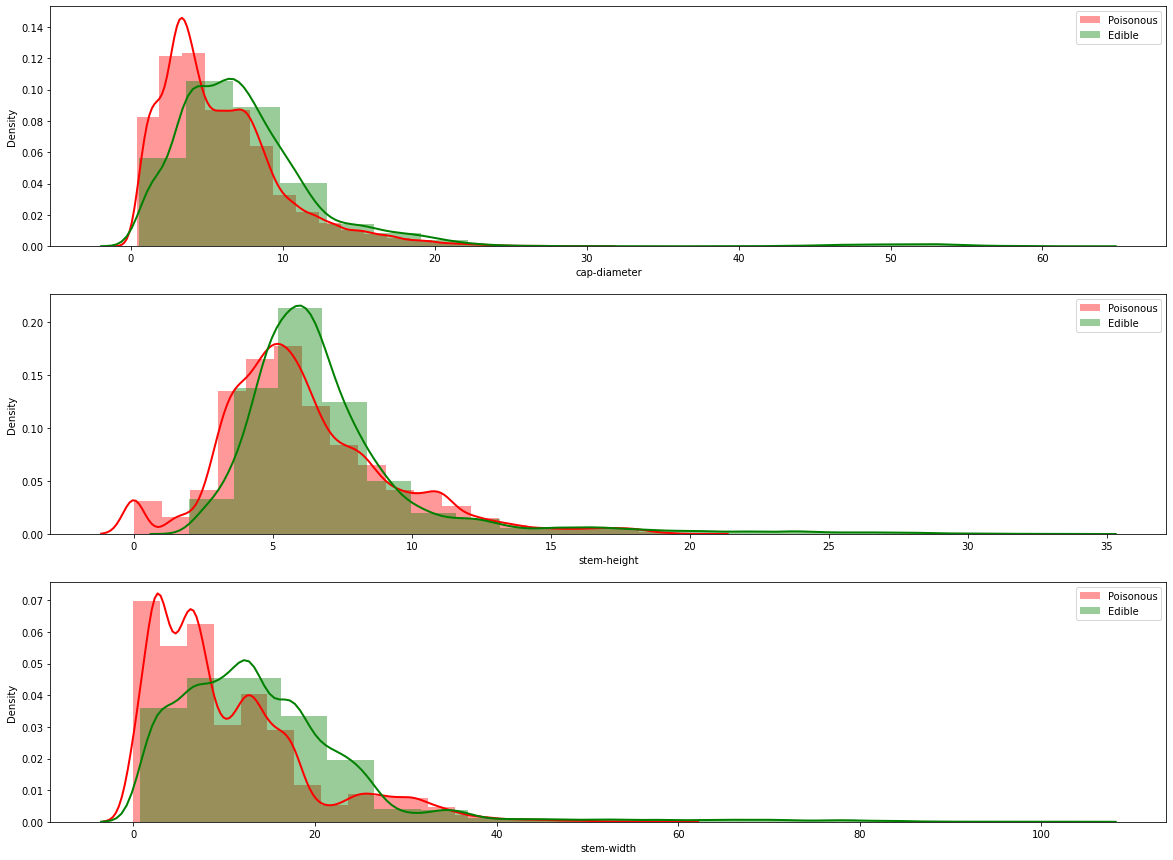

In [12]:
fig = plt.figure(figsize=(20,15))
index = 1
for col in ['cap-diameter','stem-height','stem-width']:
    fig.add_subplot(3,1,index)
    sns.distplot(df[df['class']==0][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Poisonous', color='red')
    sns.distplot(df[df['class']==1][col].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='Edible', color='green')
    index += 1
    plt.legend()

plt.show()


Si evince come gli attributi messi in luce dalla matrice di covarianza tendano ad avere una distribuzione gaussiana e a variare in maniera simile.



#### 1.4.2 Correlazione variabili categoriche

Il coefficente di Pearson non è definito quando le variabili sono categoriche. 

Non possiamo calcolare la correlazione nel caso di variabili categoriche, in quanto la correlazione in termini semplici è :
- se x aumenta, y aumenta, diminuisce o rimane lo stesso. 

Nel caso di variabili categoriali non aumentano né diminuiscono. 
Per le variabili categoriche calcoliamo l'associazione.

Un'opzione comune per gestire questo scenario consiste nell'usare prima la codifica one-hot e suddividere ogni possibile opzione di ciascuna funzionalità categoriale in funzionalità 0 o 1. Ciò consentirà quindi l'uso della correlazione, ma può facilmente diventare troppo complesso da analizzare.

Ciò di cui abbiamo bisogno è qualcosa che assomigli a una correlazione, ma funzioni con valori categoriali — o più formalmente, stiamo cercando una misura di associazione tra due caratteristiche categoriali.

Quindi utilizziamo il V di Cramer. 
Si basa su una variazione nominale del test del chi quadro di Pearson.
- Analogamente alla correlazione, l'output è compreso nell'intervallo [0,1], dove 0 significa nessuna associazione e 1 è un'associazione completa. (A differenza della correlazione, non ci sono valori negativi, poiché non esiste un'associazione negativa. O c'è o non c'è)
- Come la correlazione, la V di Cramer è simmetrica — è insensibile allo scambio di x e y

Il chi-square independence test  è una procedura per verificare se due variabili categoriche sono correlate in una certa popolazione.

In [13]:
''''
crammers V versione modificata

Questa funzione è una variazione dell'effettiva funzione v del crammer
La V di Cramér può essere uno stimatore fortemente distorto della sua controparte della popolazione e tenderà a sovrastimare 
la forza dell'associazione. Viene utilizzata una correzione del bias.
'''

def cramers_v(col1, col2):
    covariance_matrix = pd.crosstab(col1,col2)        #pd.crosstab(col1,col2) creates a contingency table between col1 and col2
    chi2 = ss.chi2_contingency(covariance_matrix)[0]  #it computes the chi-square statistic and p-value for the 
    n = covariance_matrix.sum().sum()
    phi2 = chi2/n
    r,k = covariance_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [14]:
cols=list()
before=list()
for i in df.columns :
   if i != 'cap-diameter' and i!='stem-height' and i!='stem-width' and i!='class':
     before.append(df[i].unique())
     cols.append(i)

In [15]:
import itertools
categorical_var = list(itertools.combinations(cols,2))

In [16]:
row=list()
for pairs in categorical_var:
     data = list()
     value = cramers_v(df[pairs[0]], df[pairs[1]])
     data.append(pairs[0])
     data.append(pairs[1])
     data.append(value)
     row.append(data)

categorical_association = pd.DataFrame(row,columns = ['features1','features2','association']) 
categorical_association.drop_duplicates()

THRESHOLD = 0.6
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(categorical_association.loc[categorical_association['association'] >= THRESHOLD])

           features1     features2  association
58   gill-attachment  gill-spacing        0.638
115        veil-type    veil-color        0.715
117        veil-type     ring-type        0.731
126         has-ring     ring-type        0.891


Andiamo ora a vedere come sono legate le variabili categoriche con la commestibilità. 

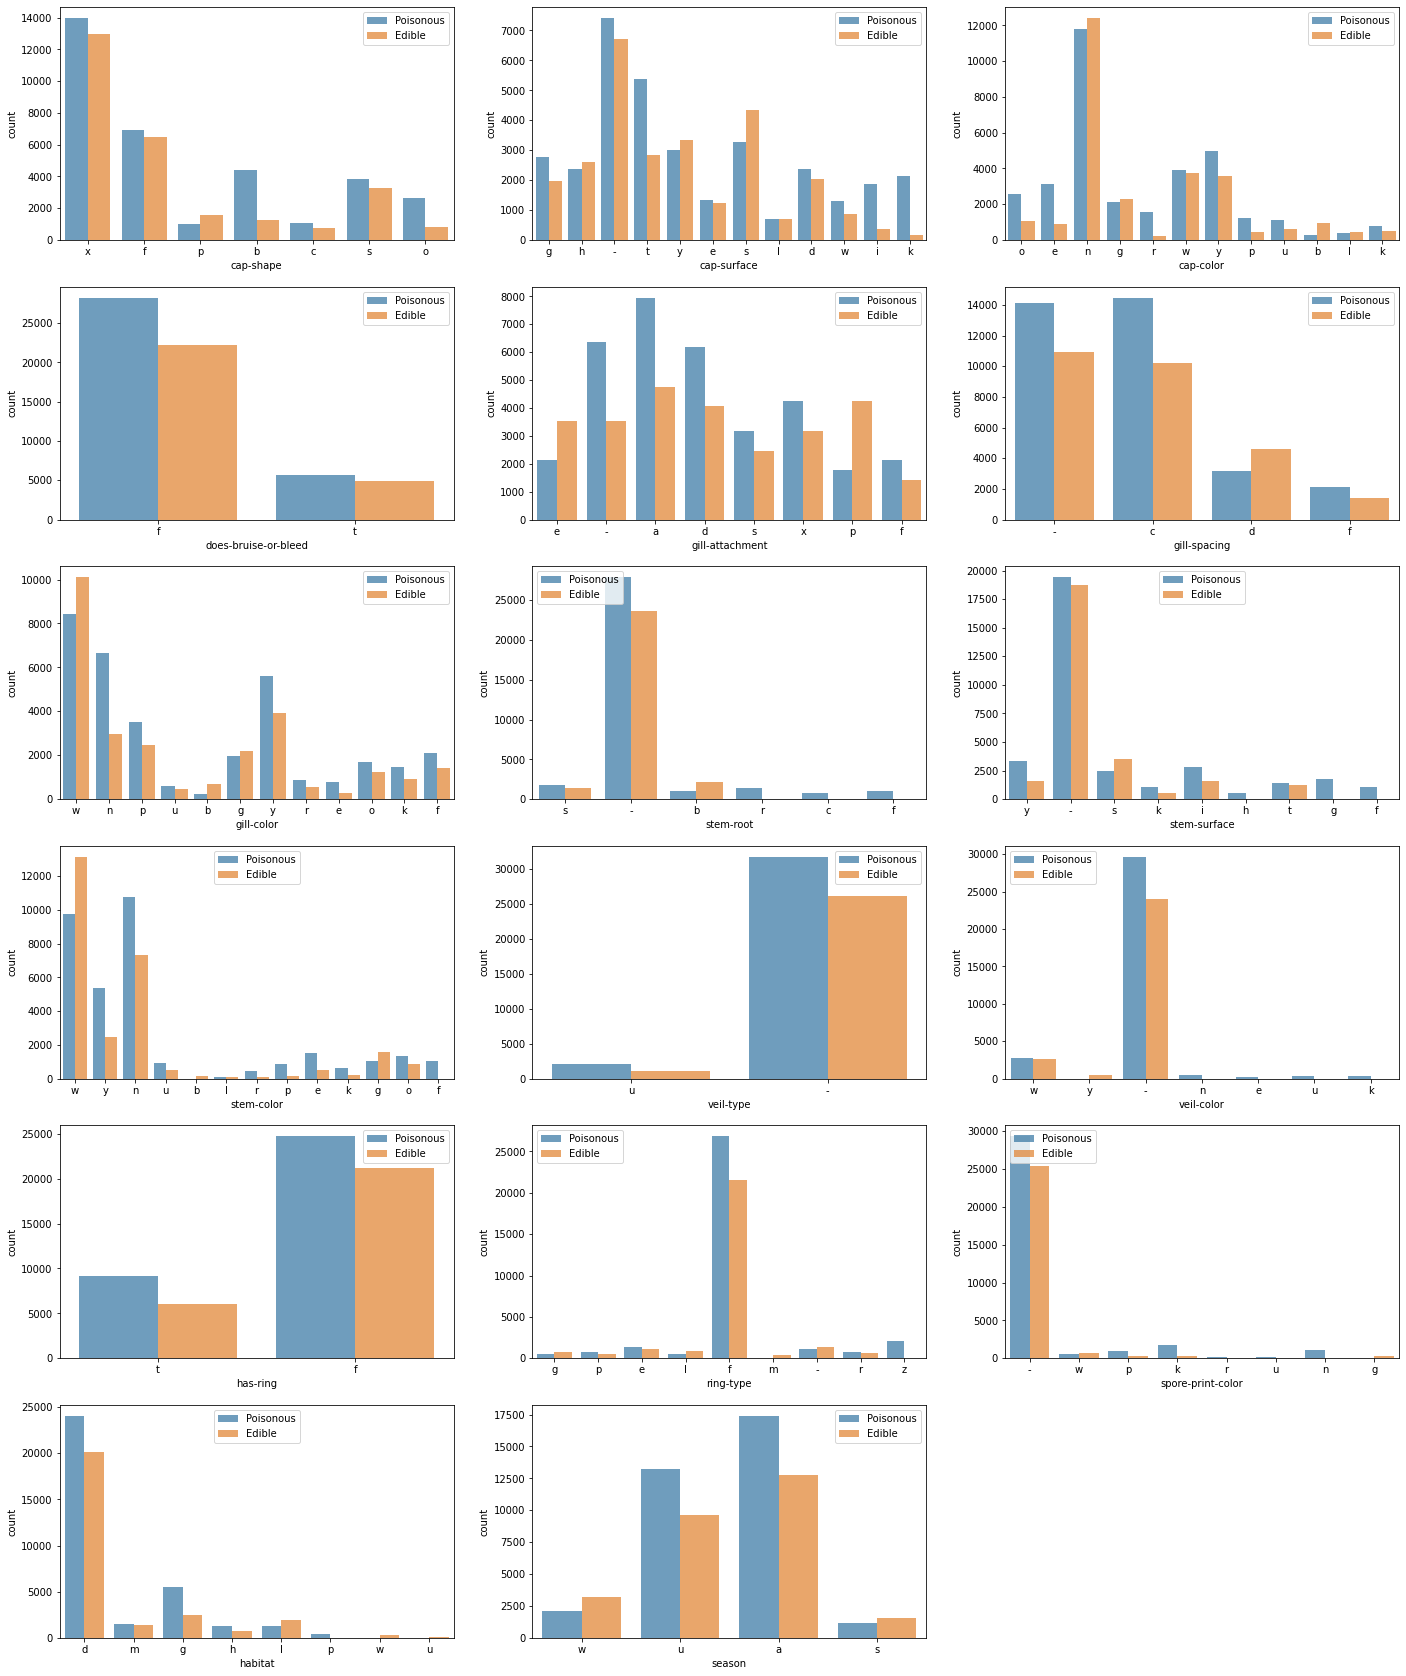

In [17]:
fig = plt.figure(figsize=(24, 30))
i = 1
for col in df.columns:
    if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width'  :
        fig.add_subplot(6,3,i)
        g = sns.countplot(x=col, data=df,hue='class', alpha=.7)
        plt.legend(['Poisonous','Edible'])
        i += 1
plt.show()

La seguente funzione si occupa di calcolare la probabilità che un fungo sia commestibile a partire da un valore di un attributo passato come parametro

In [18]:
def cond_prob(feature):
    r = df[df[feature].notnull()][feature].unique()
    p = []
    for val in r:
        joint = df[(df[feature]==val) & (df['class']==1)].shape[0]
        pre = df[(df[feature]==val)].shape[0]
        post_1 = joint/pre
        p.append([val, post_1])
    return pd.DataFrame(p, columns=['Feature value','probability'])

In [19]:
#Probabilità che un fungo sia commestibile a partire dai diversi attributi
THRESHOLD = 0.2
for col in df.columns:
  if col != 'class':
    p = cond_prob(col)
    lowerData = p[p['probability']<THRESHOLD]
    upperData = p[p['probability']>1-THRESHOLD]
    if not lowerData.empty:
      print(col, " " ,lowerData)
    if not upperData.empty:
      print(col, " ", upperData)
##??non si capisce

cap-diameter         Feature value  probability
4             14.64     0.142857
16            17.40     0.142857
19            13.00     0.111111
48            14.96     0.125000
65            16.77     0.000000
...             ...          ...
2566          30.34     0.000000
2567          22.90     0.000000
2568          22.85     0.000000
2569          21.80     0.000000
2570          20.42     0.000000

[264 rows x 2 columns]
cap-diameter         Feature value  probability
98            15.31     0.875000
499           12.69     0.823529
517           11.09     0.814815
600           13.41     0.857143
777           11.62     0.857143
...             ...          ...
2487          54.64     1.000000
2488          46.29     1.000000
2489          52.19     1.000000
2490          51.45     1.000000
2491          55.11     1.000000

[550 rows x 2 columns]
cap-surface      Feature value  probability
10             i     0.165843
11             k     0.078593
cap-color     Feature valu

#### 1.4.2 Studio velenosità dei funghi a partire dalle features

Andiamo quindi a cercare, impostando una threshold, quali funghi siano più o meno probabilmente commestibili.

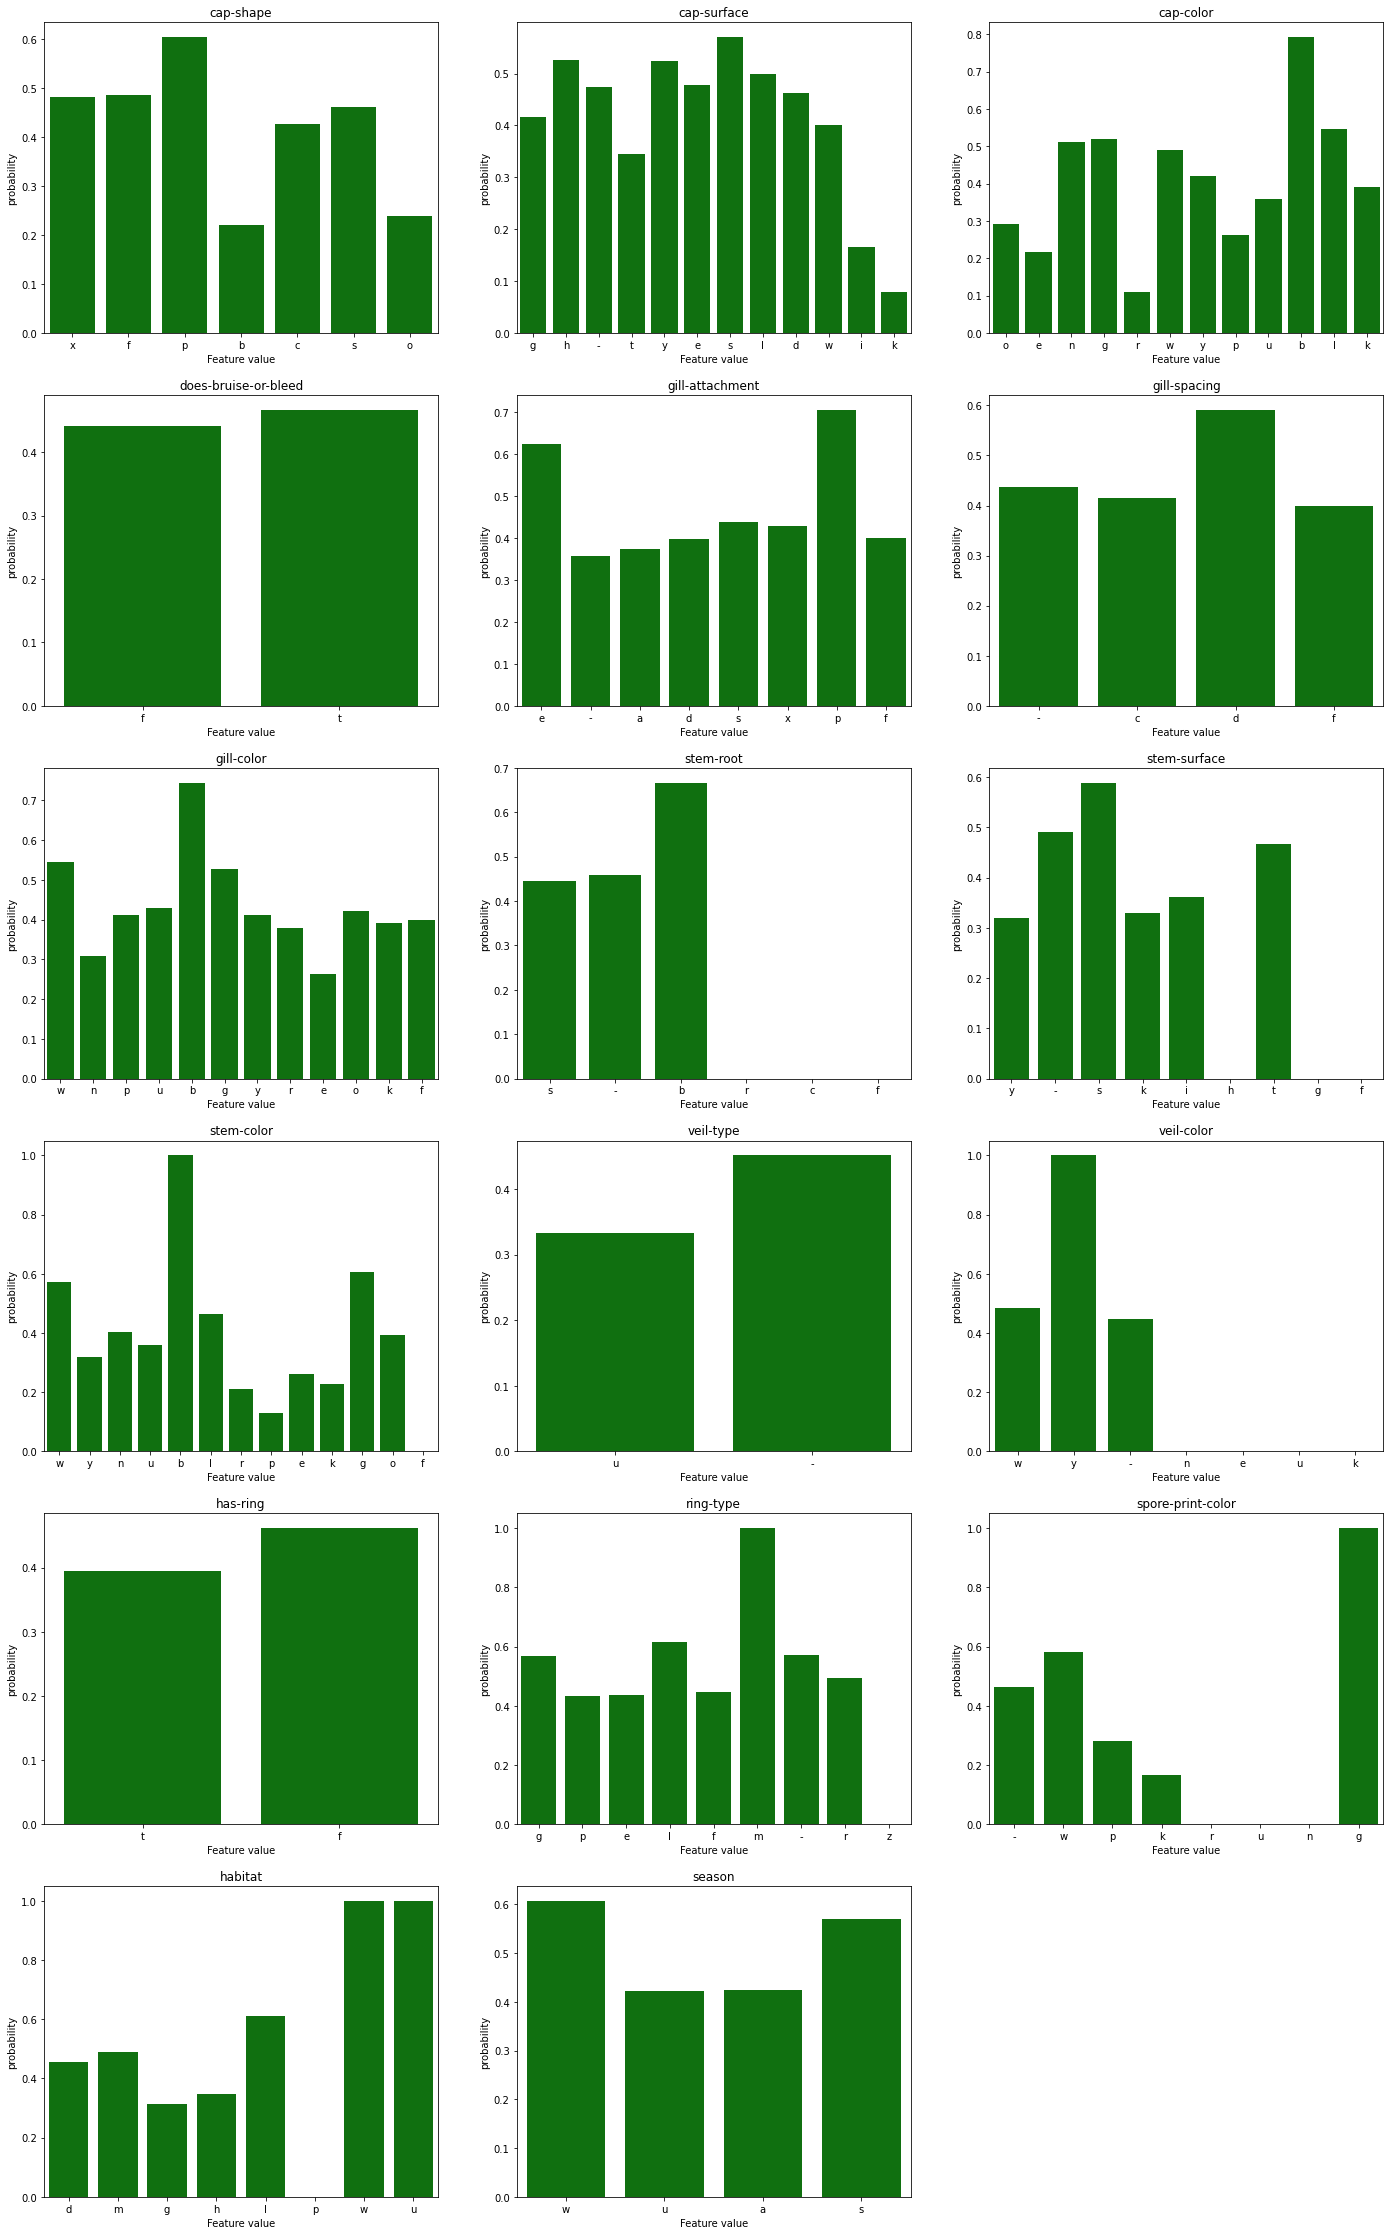

In [20]:
#Probabilità che un fungo sia commestibile a partire dai diversi attributi
fig = plt.figure(figsize=(24, 40))
i=1
for col in df.columns:
  if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width':
        fig.add_subplot(6,3,i)
        p = cond_prob(col)
        sns.barplot(x = 'Feature value', y = 'probability', data=p, color='green')
        plt.title(col)
        i+=1
plt.show()

#### 1.4.3 Correlazione tra mix di dati numerici e categorici


Per il mix di dati continui e categoriali possiamo utilizzare ANOVA (analisi della varianza) per determinare l'associazione.

Il test ANOVA permette di verificare se una variabile numerica varia in base ai livelli di una variabile categorica. 

-  Pvalue > α: Se il valore p è maggiore al livello di significatività concludiamo che le medie statistiche non differiscono significativamente

In [21]:
continous_var=df[['cap-diameter','stem-height','stem-width','class']]
categorical_var=cols

In [22]:
alpha = 0.05
data=[]
for continous_field in continous_var :
    for categorical_field in categorical_var: 
     row=[]
     un = df[categorical_field].unique()
     if(len(un)>=3) :
      groups = df.groupby(categorical_field).groups
      column=df[continous_field]
      groups_list=[]
      for i in un :
          groups_list.append(column[groups[i]])
     oneway = ss.f_oneway(*groups_list)
     pvalue = oneway[1]
     statistic = oneway[0]
     row.append(continous_field)
     row.append(categorical_field)
     row.append(pvalue)
     row.append(statistic)
     data.append(row)

mix_association = pd.DataFrame(data,columns = ['features1','features2','p-value','statistic']) 
mix_association.drop_duplicates()


with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 6,
                       ):
    print(mix_association.loc[mix_association['p-value'] <= alpha])


       features1             features2        p-value    statistic
0   cap-diameter             cap-shape   0.000000e+00   783.021334
1   cap-diameter           cap-surface   0.000000e+00   544.717225
2   cap-diameter             cap-color  2.444148e-118    53.418926
3   cap-diameter  does-bruise-or-bleed  2.444148e-118    53.418926
4   cap-diameter       gill-attachment   0.000000e+00  1947.697362
5   cap-diameter          gill-spacing  2.610588e-316   492.578534
6   cap-diameter            gill-color   0.000000e+00   517.973617
7   cap-diameter             stem-root   0.000000e+00   911.758369
8   cap-diameter          stem-surface   0.000000e+00  1321.257788
9   cap-diameter            stem-color   0.000000e+00   442.585352
10  cap-diameter             veil-type   0.000000e+00   442.585352
11  cap-diameter            veil-color   2.989633e-53    43.424012
12  cap-diameter              has-ring   2.989633e-53    43.424012
13  cap-diameter             ring-type   0.000000e+00   365.33

group1,group2,meandiff,p-adj,lower,upper,reject
-,c,-0.0223,0.001,-0.0337,-0.011,True
-,d,0.1543,0.001,0.1378,0.1708,True
-,f,-0.0366,0.001,-0.0594,-0.0138,True
c,d,0.1766,0.001,0.1601,0.1931,True
c,f,-0.0143,0.3749,-0.0371,0.0085,False
d,f,-0.1909,0.001,-0.2167,-0.1652,True


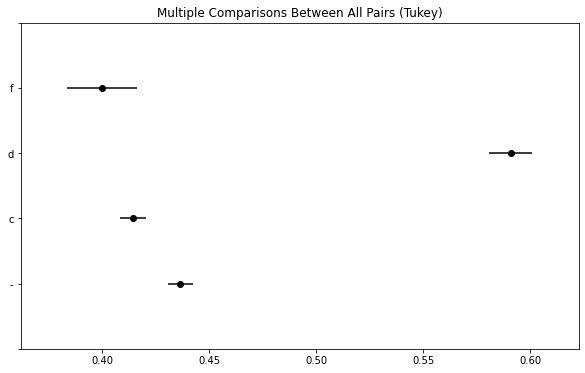

In [23]:
tukey = pairwise_tukeyhsd(endog=df['class'],     # Data
                          groups=df['gill-spacing'],   # Groups
                          alpha=0.05)          # Significance level
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

group1,group2,meandiff,p-adj,lower,upper,reject
a,s,0.1458,0.001,0.1205,0.1712,True
a,u,-0.0024,0.9,-0.0135,0.0087,False
a,w,0.1831,0.001,0.1642,0.2021,True
s,u,-0.1482,0.001,-0.1739,-0.1225,True
s,w,0.0373,0.0074,0.0074,0.0672,True
u,w,0.1855,0.001,0.1661,0.2049,True


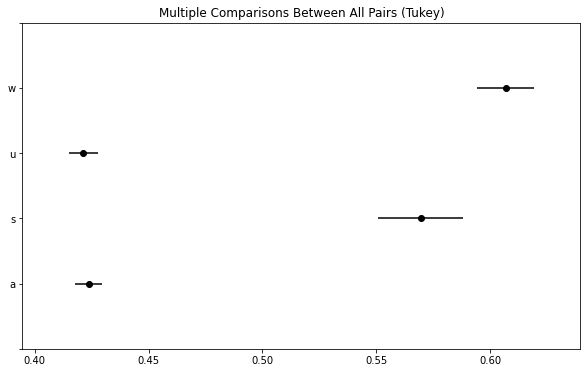

In [24]:
tukey = pairwise_tukeyhsd(endog=df['class'],     # Data
                          groups=df['season'],   # Groups
                          alpha=0.05)          # Significance level
tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

### 1.5 Conclusione

## 2 Manipolazione dati

#### 2.1 Conversione variabili categoriche

Alcune implementazioni di algoritmi di apprendimento automatico richiedono che tutti i dati siano numerici. Ad esempio, scikit-learn ha questo requisito.

Ciò significa che i dati categorici devono essere convertiti in una forma numerica.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
cols=list()
before=list()
for i in df.columns :
   if i != 'cap-diameter' and i!='stem-height' and i!='stem-width' and i!='class':
     before.append(df[i].unique())
     cols.append(i)

encoder = OrdinalEncoder()
encoder.fit(df[cols])
name = encoder.feature_names_in_
df[cols]=encoder.transform(df[cols])

after = encoder.categories_
after
for i in range(0,len(name)) : 
  print(name[i])
  print(before[i])
  print(after[i])

cap-shape
['x' 'f' 'p' 'b' 'c' 's' 'o']
['b' 'c' 'f' 'o' 'p' 's' 'x']
cap-surface
['g' 'h' '-' 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
['-' 'd' 'e' 'g' 'h' 'i' 'k' 'l' 's' 't' 'w' 'y']
cap-color
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
['b' 'e' 'g' 'k' 'l' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
does-bruise-or-bleed
['f' 't']
['f' 't']
gill-attachment
['e' '-' 'a' 'd' 's' 'x' 'p' 'f']
['-' 'a' 'd' 'e' 'f' 'p' 's' 'x']
gill-spacing
['-' 'c' 'd' 'f']
['-' 'c' 'd' 'f']
gill-color
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
['b' 'e' 'f' 'g' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stem-root
['s' '-' 'b' 'r' 'c' 'f']
['-' 'b' 'c' 'f' 'r' 's']
stem-surface
['y' '-' 's' 'k' 'i' 'h' 't' 'g' 'f']
['-' 'f' 'g' 'h' 'i' 'k' 's' 't' 'y']
stem-color
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
['b' 'e' 'f' 'g' 'k' 'l' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
veil-type
['u' '-']
['-' 'u']
veil-color
['w' 'y' '-' 'n' 'e' 'u' 'k']
['-' 'e' 'k' 'n' 'u' 'w' 'y']
has-ring
['t' 'f']
['f' 't']
ring-type
['g' 'p' 'e' 

In [27]:
df


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,6.0,3.0,6.0,0.0,3.0,0.0,10.0,16.95,...,5.0,8.0,11.0,1.0,5.0,1.0,3.0,0.0,0.0,3.0
1,0,16.60,6.0,3.0,6.0,0.0,3.0,0.0,10.0,17.99,...,5.0,8.0,11.0,1.0,5.0,1.0,3.0,0.0,0.0,2.0
2,0,14.07,6.0,3.0,6.0,0.0,3.0,0.0,10.0,17.80,...,5.0,8.0,11.0,1.0,5.0,1.0,3.0,0.0,0.0,3.0
3,0,14.17,2.0,4.0,1.0,0.0,3.0,0.0,10.0,15.77,...,5.0,8.0,11.0,1.0,5.0,1.0,6.0,0.0,0.0,3.0
4,0,14.64,6.0,4.0,6.0,0.0,3.0,0.0,10.0,16.53,...,5.0,8.0,11.0,1.0,5.0,1.0,6.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,1.18,5.0,8.0,11.0,0.0,4.0,3.0,2.0,3.93,...,0.0,0.0,12.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
61065,0,1.27,2.0,8.0,11.0,0.0,4.0,3.0,2.0,3.18,...,0.0,0.0,12.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
61066,0,1.27,5.0,8.0,11.0,0.0,4.0,3.0,2.0,3.86,...,0.0,0.0,12.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
61067,0,1.24,2.0,8.0,11.0,0.0,4.0,3.0,2.0,3.56,...,0.0,0.0,12.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


In [ ]:
'''
column_values = df['class'].unique()
count = 0 
print('Class conversion:')
for i in df.columns :
   if i != 'cap-diameter' and i!='stem-height' and i!='stem-width'  :
    df2 = df[i].unique()
    count =0 
    print(i)
    for p in df2 : 
       df[i] = df[i].replace(p,count)
       print(p, "->", count)
       count= count+1
'''

###2.2 Features scaling

Features scaling è un metodo utilizzato per normalizzare l'intervallo di variabili indipendenti o funzionalità dei dati. 

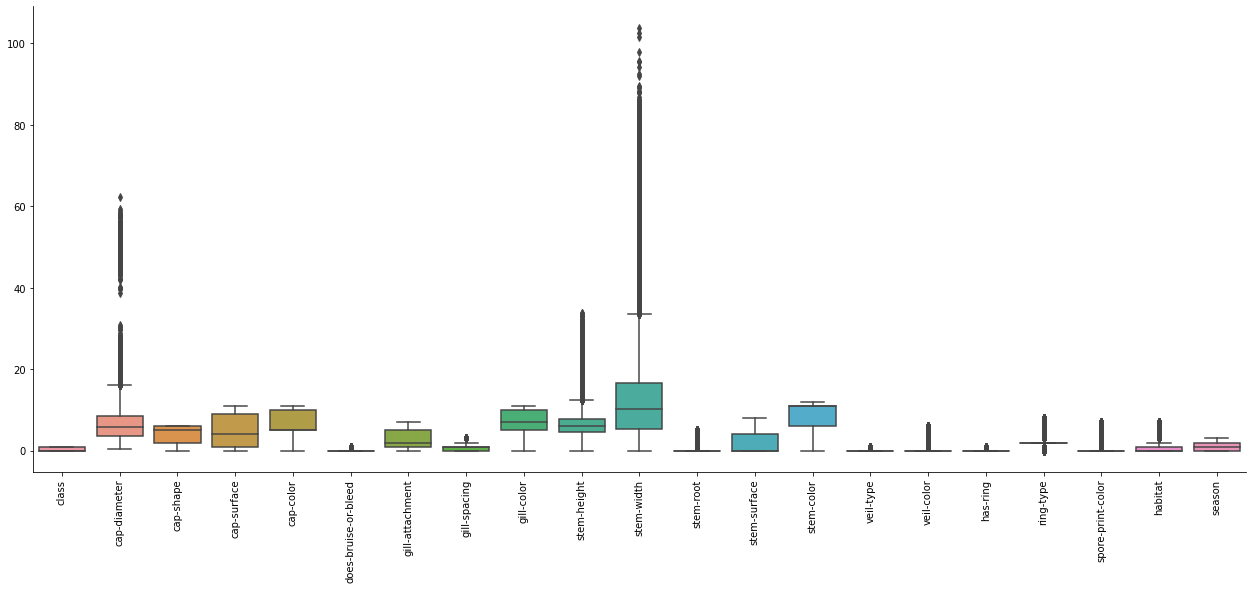

In [28]:
p = sns.factorplot(data=df , kind='box' , size=7, aspect=2.5)
p.set_xticklabels(rotation=90)

Come si vede nel grafico, nel nostro caso in esame non è necessario effettuare il features scaling. I valori sono distribuiti su piccola scala.


### 2.3 Features Selection

Per effettuare la feature selection si può procedere in diversi modi:

- Analisi univariata (mutual information)
- Cross validation
- Tecniche Lasso
- Algoritmo genetico

Vediamo i primi due

#### 2.3.1 Mutual information

In questo procedimento vengono selezionate solo gli attributi più significative ai fini della classificazione scartando quelli meno importanti. Un metodo molto utilizzato è la Mutual Information la quale permette di stimare la dipendenza tra due variabili (un valore piccolo indica una minor dipendenza).


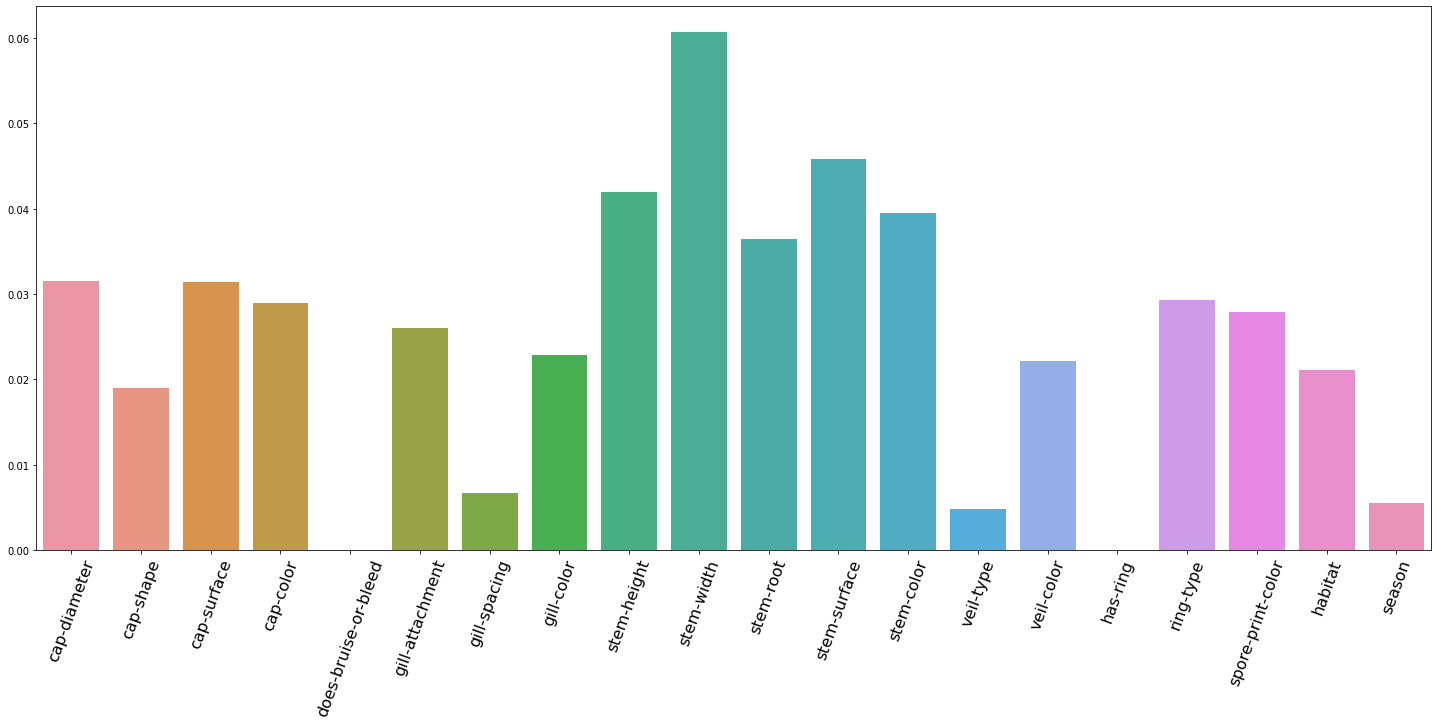

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold, mutual_info_classif, mutual_info_classif

#Dividiamo gli attributi dalla classe target
X = df.drop(['class'], axis=1)
Y=df['class']
y = np.array(Y,dtype = 'float32')
x = np.array(X,dtype = 'float32')

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.8)


scaler = StandardScaler()
d = scaler.fit_transform(x_train)
g = scaler.transform(x_test)
names = X.columns
x_train_scaled = pd.DataFrame(d, columns = names)
x_test_scaled = pd.DataFrame(g, columns = names)


model = SelectKBest(mutual_info_classif)
model.fit(x_train_scaled, y_train)
x_train_selected_mi = model.transform(x_train_scaled)
x_train_scaled_mi = model.transform(x_train_scaled)
x_test_scaled_mi = model.transform(x_test_scaled)


mi = mutual_info_classif(x_train_scaled,y_train)
f, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=X.columns , y=mi)
plt.xticks(rotation = 70 , fontsize=16)
plt.show()

#### 2.3.2 Cross validation

In [30]:
#5-fold cross validation
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
X = df.drop(['class'], axis=1)
Y=df['class']
logreg=LogisticRegression()
kf=KFold(n_splits=10)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Accuracies are {}".format(score))
print("Average Cross Validation accuracy :{}".format(score.mean()))

Cross Validation Accuracies are [0.60094973 0.57573277 0.46045522 0.5244801  0.41280498 0.64990994
 0.6824955  0.57753398 0.50270182 0.6136587 ]
Average Cross Validation accuracy :0.5600722721253704


### 2.4 Features Extraction

Con questa tecnica i dati vengono mappati in uno spazio dimensionalmente più piccolo, il tutto cercando di mantenere la fedeltà dei dati.

- Analisi delle componenti principali
- Analisi delle componenti indipendenti
- Clustering
- Trasformata di Hough
- Riconoscimento dei contorni
- Riconoscimento di angoli
- Riconoscimento di regioni
- Scale-invariant feature transform
- Template matching
- Data mining
- Riduzione della dimensionalità

Noi ci concentreremo su PCA e Clustering

####2.4.1 PCA

E' stato inoltre applicato ad ogni modello la <strong>PCA</strong> (Principal Component Analisys) che permette di mappare i dati in uno spazio dimensionalmente più piccolo mantenendo la fedeltà degli stessi, dove per fedeltà si intende la distanza tra il punto e la sua proiezione. Mappando i dati in uno spazio più piccolo ma mantenendo la varianza dei dati si garantiscono stime più accurate con uno sforzo computazionale da parte del modello inferiore. In particolare si mappano i dati in uno spazio dimensionale $d^I$ definito dagli autovettori relativi ai massimi autovalori che garantiscono quindi maggiore varianza.

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

X = df.drop(['class'], axis=1)
Y=df['class']

scaler = StandardScaler()
x_pca = scaler.fit_transform(X)
x_pca_scalati = pd.DataFrame(x_pca)
pca = PCA(n_components = 'mle', svd_solver = 'full').fit(x_pca)
X_new = pca.transform(x_pca)
X_new_df = pd.DataFrame(X_new)

X_train,X_test,Y_train,Y_test = train_test_split(X_new_df, y, test_size = 0.2, train_size=0.8)

##3 Classificatori

##3.1 SVM

<font size="3">Le <strong> Support Vector Machines </strong> sono dei modelli di apprendimento supervisionato associati ad algoritmi di apprendimento per la regressione e la classificazione. Dato un insieme di esempi per l'addestramento, ognuno dei quali etichettato con la classe di appartenenza fra le due possibili classi, si costruisce un modello che assegna i nuovi esempi a una delle due classi ottenendo quindi un classificatore lineare binario non probabilistico. SVM utilizza la rappresentazione degli esempi come punti nello spazio mappati in modo tale che gli esempi appartenenti alle due diverse categorie siano chiaramente separati da uno spazio (il margine geometrico) il più possibile ampio. La predizione dei nuovi punti viene fatta quindi sulla base del lato (rispetto all'iperpiano) in cui risiedono</font>

###3.1.1 SVM senza MI e senza PCA

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

grid = dict()
#grid['C'] = [0.1,1,10,100,1000]
#grid['gamma'] = [1,0.1,0.01,0.001,0.0001]
svm = SVC()
grid_result=svm.fit(x_train_scaled,y_train)
#svm = GridSearchCV(SVC(), param_grid = grid, refit = True)
#grid_result = svm.fit(x_train_scaled, y_train)
#print("Parametri %s" % grid_result.best_params_)


In [43]:
svm_predict_target = grid_result.predict(x_test_scaled)
rec = recall_score(y_test, svm_predict_target)
pre = precision_score(y_test, svm_predict_target)
f1 = f1_score(y_test, svm_predict_target)
acc_svm_new = pd.DataFrame(columns=["Name",  "Recall"], dtype = object)

a_series = pd.Series(["SVM ",  round(rec,3)], index = acc_svm_new.columns)
acc_svm_new = acc_svm_new.append(a_series, ignore_index=True)


score = svm.score(x_test_scaled, y_test)
print('Accuracy Score: ', round(score, 2))
print('Recall Score: ', round(rec,3))
print('Precision Score:', round(pre,2))
print('F1 Score:', round(f1,2))

Accuracy Score:  0.99
Recall Score:  0.99
Precision Score: 0.99
F1 Score: 0.99


In [44]:
# Vediamone uno scatter plot

import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=svm_predict_target,
                    mode='markers',
                    name='Pred'))

###3.1.2 SVM con PCA

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, classification_report
from sklearn.svm import SVC
grid = dict()
grid['C'] = [0.1,1,10,100,1000]
grid['gamma'] = [1,0.1,0.01,0.001,0.0001]

svm = GridSearchCV(SVC(), param_grid = grid, refit = True)
grid_result = svm.fit(X_train, Y_train)
print("Parametri %s" % grid_result.best_params_)

In [ ]:

svm_predict_target_pca = svm.predict(X_test)
rec = recall_score(Y_test, svm_predict_target_pca)
pre = precision_score(Y_test, svm_predict_target_pca)
f1 = f1_score(Y_test, svm_predict_target_pca)
acc_svm = pd.DataFrame(columns=["Name",  "Recall"], dtype = object)

a_series = pd.Series(["SVM PCA",  round(rec,3)], index = acc_svm.columns)
acc_svm = acc_svm.append(a_series, ignore_index=True)


score = svm.score(X_test, Y_test)
print('Accuracy Score: ', round(score, 2))
print('Recall Score: ', round(rec,2))
print('Precision Score:', round(pre,2))
print('F1 Score:', round(f1,2))

In [ ]:
#Graficando il tutto vediamo come il classificatore insegue correttamente il testing set
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(Y_test)), y=Y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(Y_test)), y=svm_predict_target_pca,
                    mode='markers',
                    name='Pred'))

###3.1.3 SVM con MI

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score, classification_report
from sklearn.svm import SVC

grid = dict()
grid['C'] = [0.1,1,10,100,1000] #errore ammissibile più è alto più classifica bene ma causa overfit
grid['gamma'] = [1,0.1,0.01,0.001,0.0001] #importanza elementi vicini (kernel) più è alto più si da valore agli elementi vicini
grid['kernel'] = ['rbf', 'poly', 'sigmoid']
svm = GridSearchCV(SVC(), param_grid = grid, refit = True)
grid_result = svm.fit(x_train_scaled_mi, y_train)
print("Parametri %s" % grid_result.best_params_)

In [ ]:
svm_predict_target_mi = grid_result.predict(x_test_scaled_mi)
rec = recall_score(y_test, svm_predict_target_mi)
pre = precision_score(y_test, svm_predict_target_mi)
f1 = f1_score(y_test, svm_predict_target_mi)
acc_svm2 = pd.DataFrame(columns=["Name",  "Recall"], dtype = object)

a_series = pd.Series(["SVM Mutual Information ",  round(rec,3)], index = acc_svm2.columns)
acc_svm2 = acc_svm2.append(a_series, ignore_index=True)


score = svm.score(x_test_scaled_mi, y_test)
print('Accuracy Score: ', round(score, 2))
print('Recall Score: ', round(rec,3))
print('Precision Score:', round(pre,2))
print('F1 Score:', round(f1,2))


In [ ]:
#Vediamone uno scatter plot
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=svm_predict_target_mi,
                    mode='markers',
                    name='Pred'))